## tensorflow 实现softmax回归

- softmax 用来解决分类问题
- 损失函数使用交叉熵表示 $y$ 表示类别的概率分布 : [0.1, 0.2, 0.7] = [类别1, 类别2, 类别3]

$$
H\left(\boldsymbol{y}^{(i)}, \hat{\boldsymbol{y}}^{(i)}\right)=-\sum_{j=1}^{q} y_{j}^{(i)} \log \hat{y}_{j}^{(i)}
$$

- 总结 : 
    1. softmax回归适用于分类问题。它使用softmax运算输出类别的概率分布。
    2. softmax回归是一个单层神经网络，输出个数等于分类问题中的类别个数。
    3. 交叉熵适合衡量两个概率分布的差异。

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import time
import random
import os

for module in tf, keras, pd, mpl, np, sklearn:
    print(module.__name__, module.__version__)

tensorflow 2.3.0
tensorflow.keras 2.4.0
pandas 1.3.3
matplotlib 3.4.2
numpy 1.18.5
sklearn 1.0


### 1. 读取数据集

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

print(x_train_all.shape, y_train_all.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 2. 分隔验证集和测试集

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, test_size=0.2)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


### 3. 展示数据

- plt.subplot(nrow, ncol, n)
    1. [参考博客](https://www.cnblogs.com/cgmcoding/p/13279406.html)
    2. nrow 行数
    3. ncol 列数
    4. n : 第几个图
- plt.imshow()
    1. [参考博客](https://www.cnblogs.com/cheflone/p/13159330.html)
    2. cmp : 将标量数据映射到色彩图

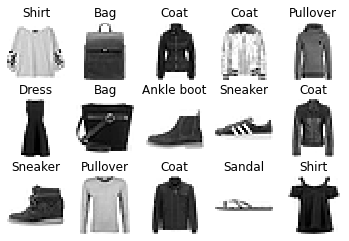

In [5]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']


def show_images(n_rows, n_cols, x_data, y_data, class_names):
    # 判断数据是否合法
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)

    # 绘制画板
    plt.plot(figsize=(n_cols * 1.4, n_rows * 1.6))
    # 遍历数据集绘制子图
    for row in range(n_rows):
        for col in range(n_cols):
            # 获取索引
            index = row * n_cols + col
            # 绘制子图画板
            plt.subplot(n_rows, n_cols, index + 1)
            # 显示数据
            # interpolation : 设置缩放图片的方式
            plt.imshow(x_data[index], cmap="binary", interpolation="nearest")
            # 取消坐标轴
            plt.axis('off')
            # 设置标题
            plt.title(class_names[y_data[index]])
    plt.show()


show_images(3, 5, x_train, y_train, class_names)

### 4. 训练模型

#### 4.1 构建模型

In [6]:
model = keras.models.Sequential()
# 1. 添加输入层
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.BatchNormalization())
# 2. 添加输出层
model.add(keras.layers.Dense(units=10, activation="softmax"))

# 打印模型结构
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


#### 4.2 设置loss和优化函数

In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(0.1), metrics=['accuracy'])

# 训练数据
history_noscaled = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_data=(x_valid, y_valid))

Epoch 1/30
188/188 [==============================] - 1s 3ms/step - loss: 26658.5391 - accuracy: 0.6618 - val_loss: 15358.1289 - val_accuracy: 0.7656
Epoch 2/30
188/188 [==============================] - 0s 2ms/step - loss: 13846.0615 - accuracy: 0.7462 - val_loss: 25830.4453 - val_accuracy: 0.6869

#### 4.3 绘制训练结果图像

In [8]:
history_noscaled.history

{'loss': [26658.5390625,
  13846.0615234375,
  12108.287109375,
  11581.7744140625,
  10232.658203125,
  10727.185546875,
  10749.7421875,
  10746.66015625,
  10421.1484375,
  9104.818359375,
  10040.146484375,
  9738.3310546875,
  9125.4208984375,
  9307.484375,
  9995.0869140625,
  9477.65625,
  9137.658203125,
  9759.681640625,
  9687.951171875,
  9291.1845703125,
  9226.177734375,
  9659.490234375,
  8769.9912109375,
  9224.3564453125,
  8683.3291015625,
  9869.1279296875,
  8845.2333984375,
  9242.869140625,
  8651.763671875,
  9432.423828125],
 'accuracy': [0.6617916822433472,
  0.7461875081062317,
  0.7596458196640015,
  0.7661250233650208,
  0.7778958082199097,
  0.7754374742507935,
  0.7747083306312561,
  0.7821458578109741,
  0.780958354473114,
  0.7917708158493042,
  0.7831249833106995,
  0.7873125076293945,
  0.7925624847412109,
  0.7911041378974915,
  0.7866874933242798,
  0.7938541769981384,
  0.7969791889190674,
  0.7887083292007446,
  0.7913958430290222,
  0.79327082633

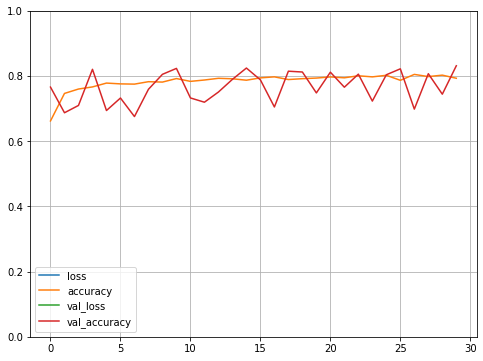

In [9]:
def plot_train_result(history):
    pd.DataFrame(history.history).plot(figsize=(8, 6))
    plt.gca().set_ylim(0, 1)
    plt.grid(True)
    plt.show()


plot_train_result(history_noscaled)

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 702us/step - loss: 5629.0059 - accuracy: 0.8156


[5629.005859375, 0.8155999779701233]

### 5. 批归一化

In [11]:
model_bn = keras.models.Sequential()
# 1. 添加输入层
model_bn.add(keras.layers.Flatten(input_shape=[28, 28]))
model_bn.add(keras.layers.BatchNormalization())
# 2. 添加输出层
model_bn.add(keras.layers.Dense(units=10, activation="softmax"))
# 打印模型结构
model_bn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [12]:

model_bn.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(0.1), metrics=['accuracy'])

# 训练数据
history_bn = model_bn.fit(x_train, y_train, epochs=30, batch_size=256, validation_data=(x_valid, y_valid))

Epoch 1/30
188/188 [==============================] - 1s 4ms/step - loss: 0.5880 - accuracy: 0.7978 - val_loss: 0.5176 - val_accuracy: 0.8220

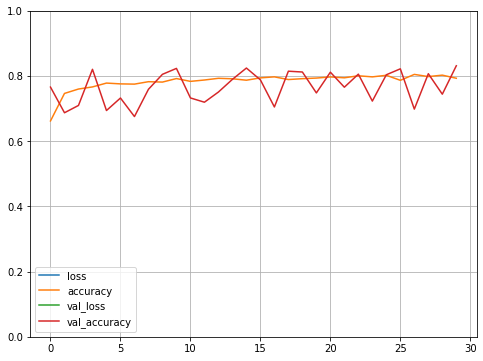

In [15]:
def plot_train_result(history):
    pd.DataFrame(history.history).plot(figsize=(8, 6))
    plt.gca().set_ylim(0, 1)
    plt.grid(True)
    plt.show()


plot_train_result(history_noscaled)

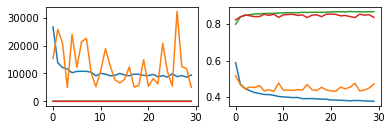

<Figure size 576x432 with 0 Axes>

In [23]:
historys = [history_noscaled, history_bn]

for index,history in enumerate(historys):
    plt.subplot(2, 2 , index+1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

plt.figure(figsize=(8,6))
plt.show()